In [2]:
import pandas as pd


plain = pd.read_csv("results/plain.csv")
native = pd.read_csv("results/opt3.csv")
invsum = pd.read_csv("results/invsum.csv")
ur2 = pd.read_csv("results/unroll2.csv")
ur4 = pd.read_csv("results/unroll4.csv")
fm = pd.read_csv("results/fastmath.csv")
avx = pd.read_csv("results/avx.csv")

df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["native"] = native["time"] * 1e6
df["no-deps"] = invsum["time"] * 1e6
df["unroll2"] = ur2["time"] * 1e6
df["unroll4"] = ur4["time"] * 1e6
df["fast-math"] = fm["time"] * 1e6
df["avx"] = avx["time"] * 1e6
df

,elements,plain,native,no-deps,unroll2,unroll4,fast-math,avx
0,128,7.28228,5.97578,6.08652,6.01662,6.19252,6.44678,5.60678
1,256,9.93816,8.01244,7.69394,7.36806,7.56728,6.39900,10.24950
2,512,11.47380,10.33300,10.50920,10.37910,9.92114,7.63282,20.24750
3,1024,18.01170,16.52020,16.40650,15.48630,16.71890,10.34640,36.90370
4,2048,32.57880,26.40680,27.50560,25.09630,25.61980,16.61910,72.27460
5,4096,57.03310,48.06740,52.29540,47.29220,46.44780,23.15510,146.93000
6,8192,109.73900,92.22410,95.97900,88.71280,89.14720,37.24960,291.45700
7,16384,222.80000,183.02100,183.04100,177.22500,173.79500,70.26050,569.30500


In [2]:
# df["native_su"] = df["plain"] / df["native"]
# print(df.to_latex(header=True, index=False, float_format="%.4f"))
# df

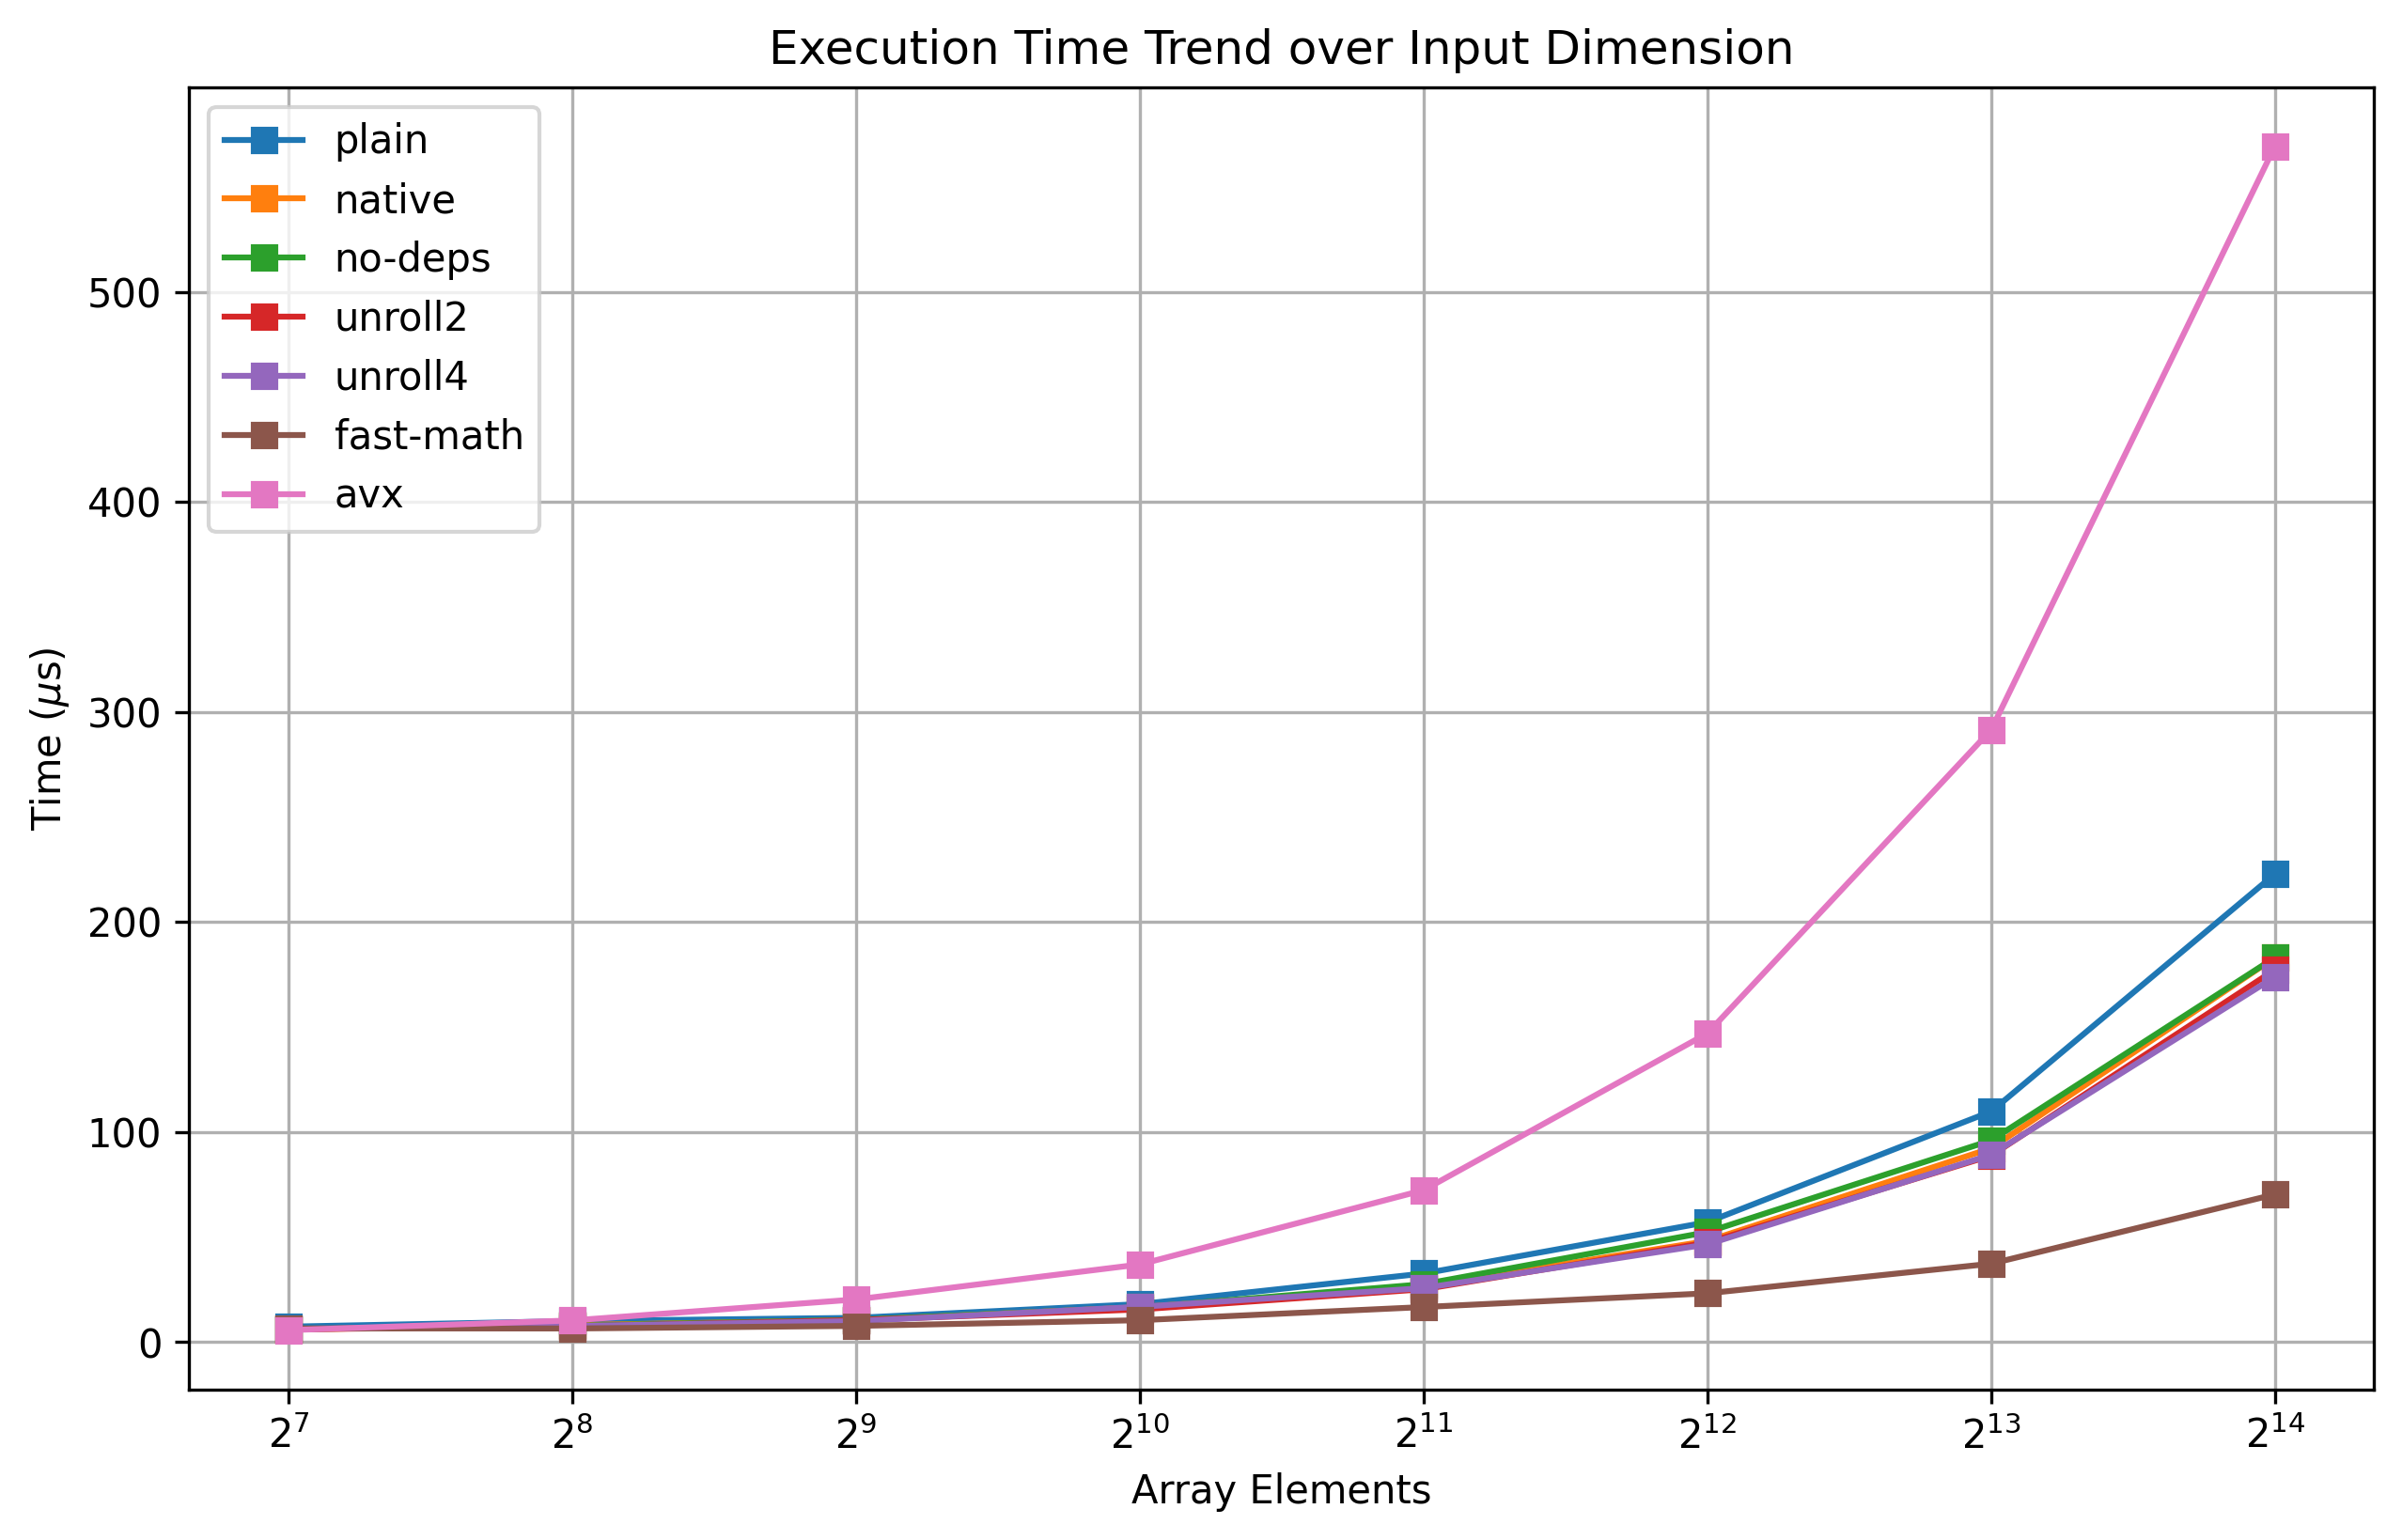

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Execution Time Trend over Input Dimension")

labels = [c for c in df.columns if c != "elements"]
for label in labels:
    plt.plot(df["elements"], df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel(r"Time ($\mu$s)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [4]:
speedup_df = df.copy()
for c in speedup_df.columns:
    if c != "elements":
        speedup_df[c] = df["plain"] / df[c]

speedup_df

,elements,plain,native,no-deps,unroll2,unroll4,fast-math,avx
0,128,1.0,1.218633,1.196460,1.210361,1.175980,1.129600,1.298835
1,256,1.0,1.240341,1.291687,1.348816,1.313307,1.553080,0.969624
2,512,1.0,1.110404,1.091786,1.105472,1.156500,1.503219,0.566677
3,1024,1.0,1.090283,1.097839,1.163073,1.077326,1.740866,0.488073
4,2048,1.0,1.233728,1.184442,1.298152,1.271626,1.960323,0.450764
5,4096,1.0,1.186524,1.090595,1.205973,1.227897,2.463090,0.388165
6,8192,1.0,1.189917,1.143365,1.237014,1.230987,2.946045,0.376519
7,16384,1.0,1.217347,1.217214,1.257159,1.281970,3.171056,0.391354


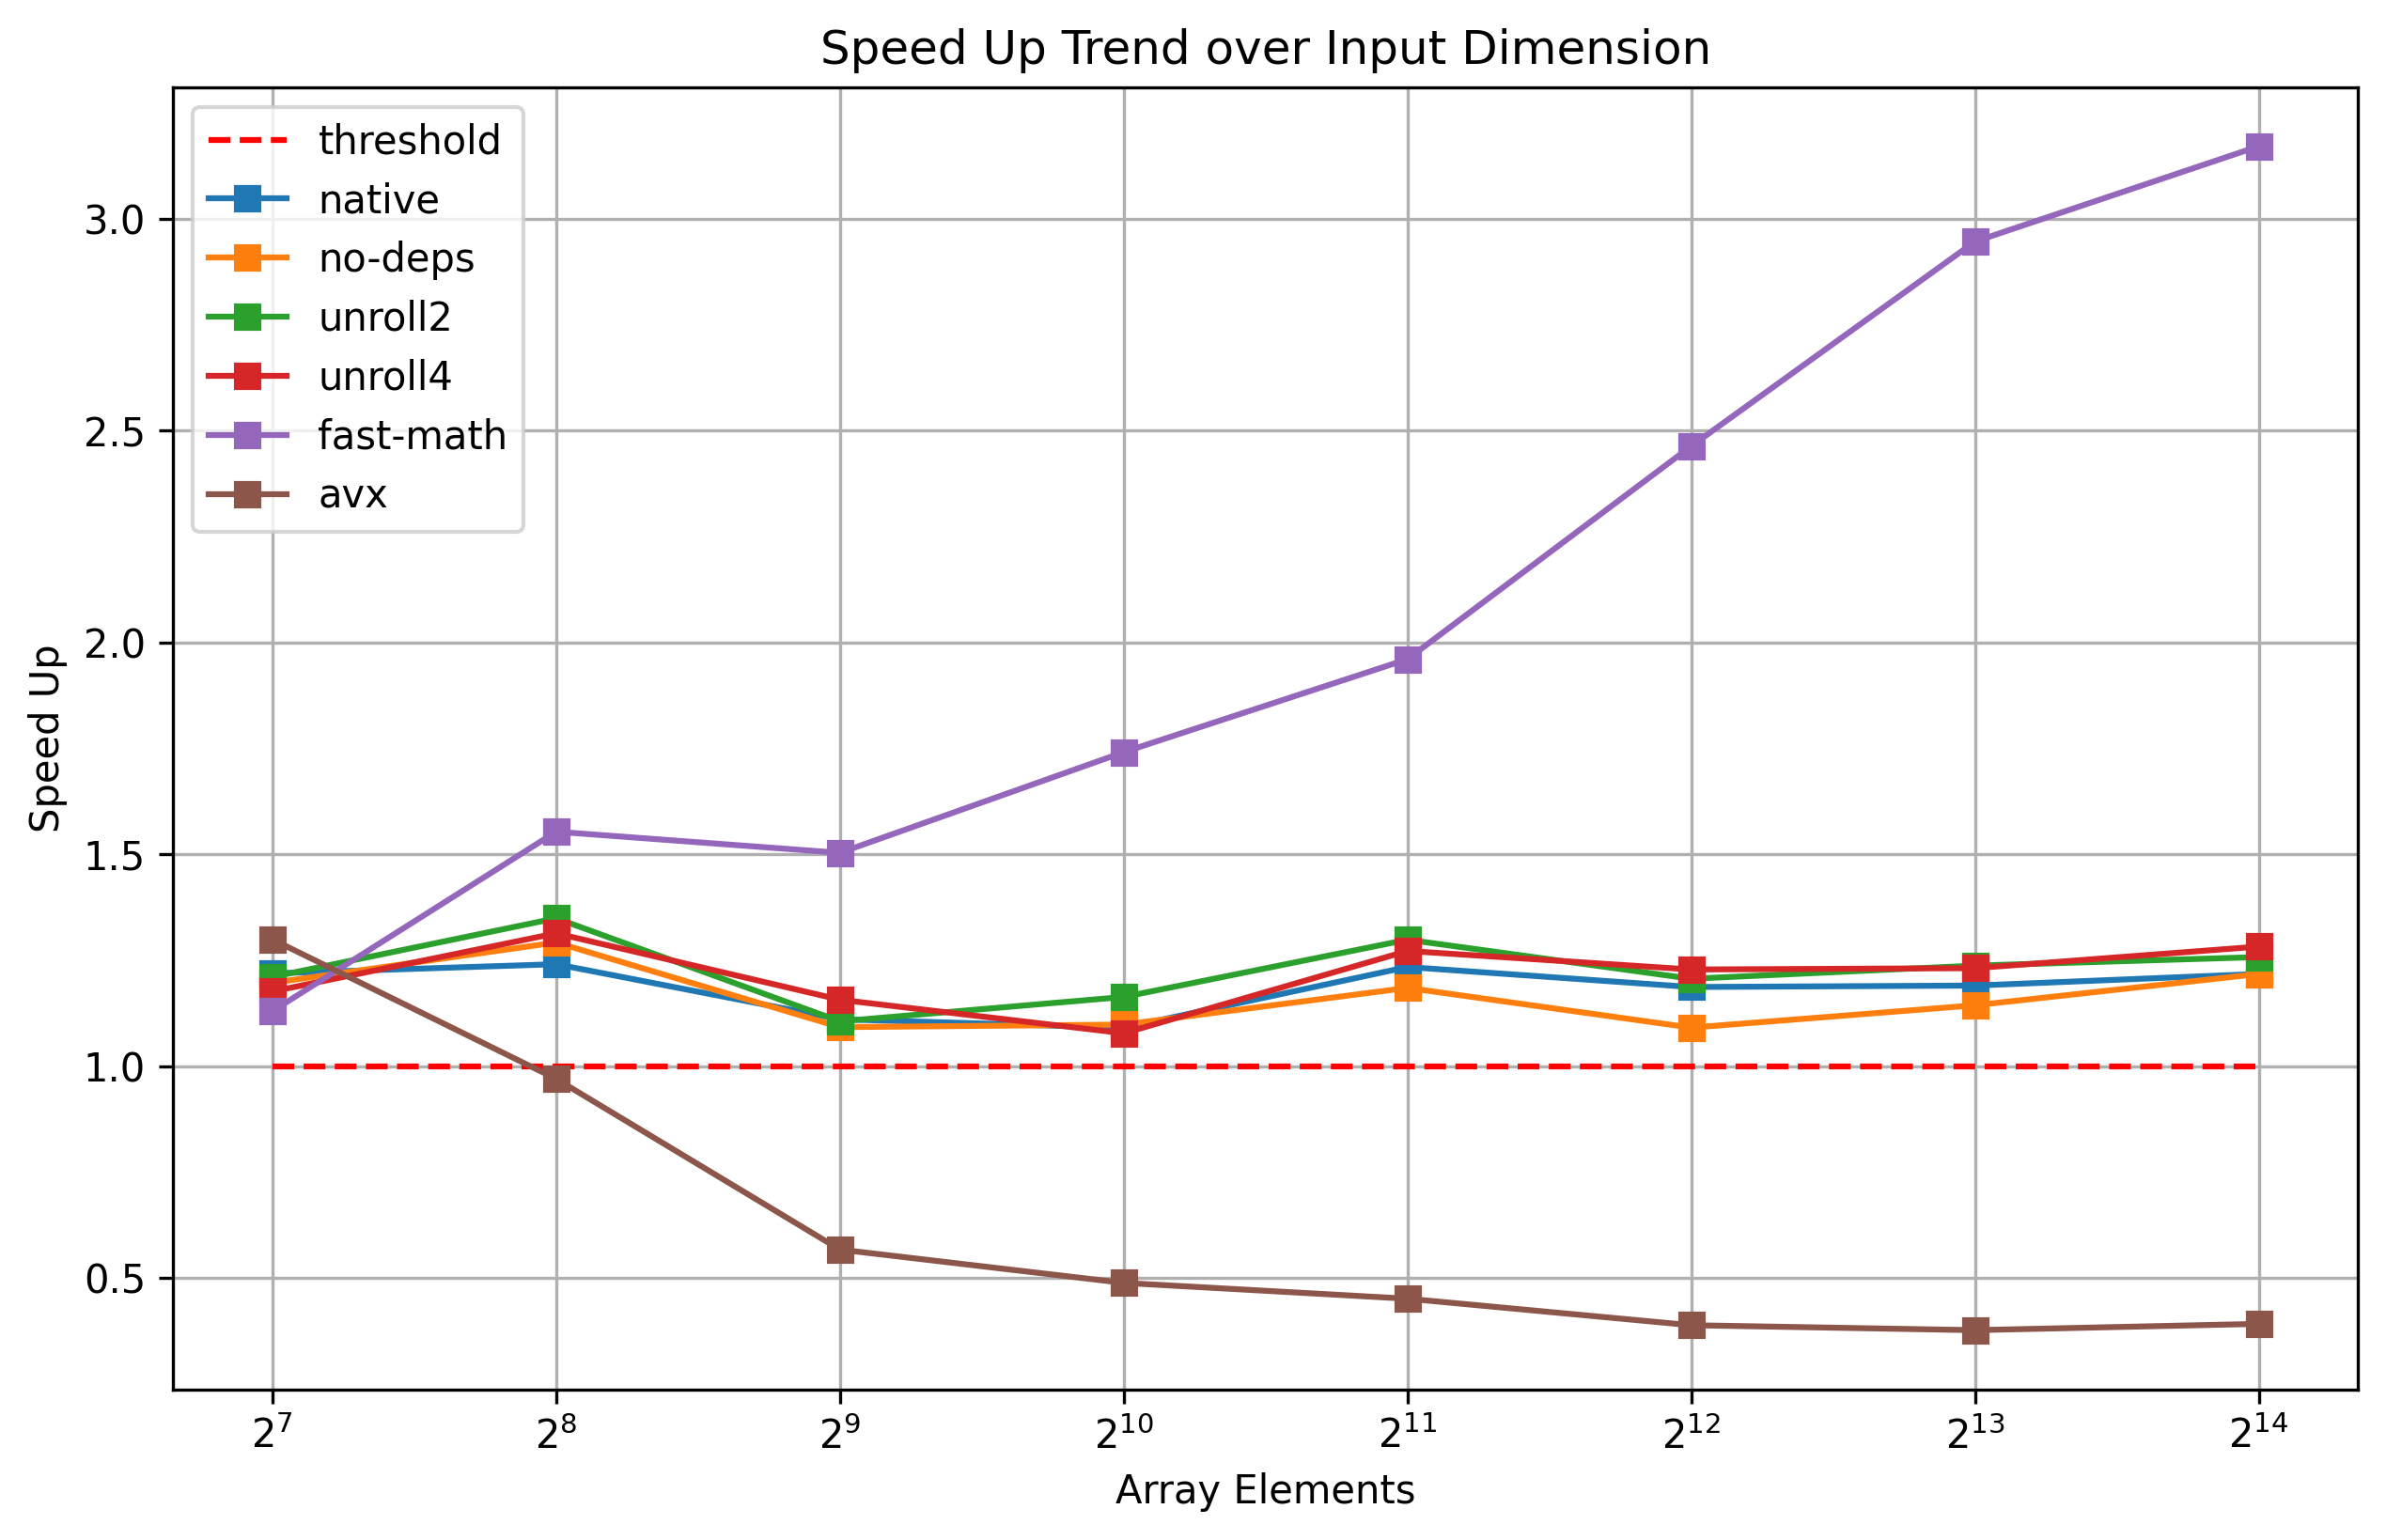

In [5]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up Trend over Input Dimension")

# threshold of good speed up
plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

for label in labels:
    if label != "plain":
        plt.plot(speedup_df["elements"], speedup_df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel("Speed Up")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()